<a href="https://colab.research.google.com/github/YacineGhenabzia/tps_big_data/blob/main/tp3_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving kaggle (3).json to kaggle (3).json


In [ ]:
import os

os.listdir()


['.config',
 'drive',
 '.kaggle',
 '.ipynb_checkpoints',
 'kaggle (3).json',
 'kaggle .json',
 'sample_data']

In [ ]:
import os
import shutil
file_name = "kaggle (3).json"

os.makedirs("/root/.kaggle", exist_ok=True)

shutil.move(file_name, "/root/.kaggle/kaggle.json")

os.chmod("/root/.kaggle/kaggle.json", 600)

print("✅ تم إعداد مفتاح API بنجاح!")


✅ تم إعداد مفتاح API بنجاح!


In [ ]:
!kaggle datasets download -d sachingupta26/dummy-sales-data --unzip -p /content/


Dataset URL: https://www.kaggle.com/datasets/sachingupta26/dummy-sales-data
License(s): unknown
100% 6.22G/6.22G [01:14<00:00, 160MB/s]
100% 6.22G/6.22G [01:14<00:00, 90.1MB/s]


In [ ]:
import pandas as pd

file_path = "/content/sales_cleaned.csv"
data = pd.read_csv(file_path)

print("\n البيانات قبل إزالة التكرارات:\n", data)

data.drop_duplicates(inplace=True)

print("\n بعد إزالة التكرارات:\n", data)

data.to_csv("/content/sales_cleaned1.csv", index=False)


In [ ]:
import pandas as pd
import shutil

file_path = "/content/sales_cleaned.csv"

temp_file = "/content/sales_cleaned1.csv"

with open(temp_file, 'w') as f_out:
    first_chunk = True

    for chunk in pd.read_csv(file_path, chunksize=10000):
        chunk_cleaned = chunk.drop_duplicates()

        chunk_cleaned.to_csv(f_out, index=False, header=first_chunk, mode='a')
        first_chunk = False

shutil.move(temp_file, file_path)

print(f" تم حذف القيم المكررة وحفظ التعديلات في نفس الملف: {file_path}")


 تم حذف القيم المكررة وحفظ التعديلات في نفس الملف: /content/sales_cleaned.csv


In [ ]:
import pandas as pd

chunk_size = 10000

file_path = "/content/sales_cleaned.csv"
chunk_iterator = pd.read_csv(file_path, chunksize=chunk_size)

first_chunk = next(chunk_iterator)
print(first_chunk.head())


   order_id  product_id  seller_id        date  num_pieces_sold  \
0         1           0          0  2022-07-10               62   
1         2           0          0  2022-07-07               38   
2         3           0          0  2022-07-05               13   
3         4           0          0  2022-07-06               94   
4         5           0          0  2022-07-02               41   

                                       bill_raw_text  
0  esctmitgntlqljxnCgkeaxrxsxcsaoobokgluqezwdbekx...  
1  cufiduzyskiviokjuoyvfxuvqmbemdsbltrgfvquyfwyhi...  
2  hscngebsortzolelfobyxyiqhrfclbxcmgiyboeekdtRir...  
3  jxhvzoobncxwzkpdldsrbdjzmumctexxwtyujfemrjlool...  
4  nqazvvrqffccuwzprmofgxgUrmoozzargmvjwimtclwvdh...  


In [ ]:
import pandas as pd
import shutil

file_path = "/content/sales_cleaned.csv"

temp_file = "/content/sales_cleaned1.csv"

with open(temp_file, 'w') as f_out:
    first_chunk = True

    for chunk in pd.read_csv(file_path, chunksize=20000):
        if 'date' in chunk.columns:
            chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce')

        chunk.to_csv(f_out, index=False, header=first_chunk, mode='a')
        first_chunk = False

shutil.move(temp_file, file_path)

print(f" تم تحويل عمود التاريخ إلى datetime وحفظ التعديلات في نفس الملف: {file_path}")


 تم تحويل عمود التاريخ إلى datetime وحفظ التعديلات في نفس الملف: /content/sales_cleaned.csv


In [ ]:
import pandas as pd

chunk_size = 10000

file_path = "/content/sales_cleaned.csv"
chunk_iterator = pd.read_csv(file_path, chunksize=chunk_size)

first_chunk = next(chunk_iterator)
print(first_chunk.head())


   order_id  product_id  seller_id        date  num_pieces_sold  \
0         1           0          0  2022-07-10               62   
1         2           0          0  2022-07-07               38   
2         3           0          0  2022-07-05               13   
3         4           0          0  2022-07-06               94   
4         5           0          0  2022-07-02               41   

                                       bill_raw_text  
0  esctmitgntlqljxnCgkeaxrxsxcsaoobokgluqezwdbekx...  
1  cufiduzyskiviokjuoyvfxuvqmbemdsbltrgfvquyfwyhi...  
2  hscngebsortzolelfobyxyiqhrfclbxcmgiyboeekdtRir...  
3  jxhvzoobncxwzkpdldsrbdjzmumctexxwtyujfemrjlool...  
4  nqazvvrqffccuwzprmofgxgUrmoozzargmvjwimtclwvdh...  


In [ ]:
import pandas as pd

file_path = "/content/sales_cleaned.csv"

chunk_size = 20000

all_values = []

for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    if 'num_pieces_sold' in chunk.columns:
        all_values.extend(chunk['num_pieces_sold'].dropna().tolist())

Q1 = pd.Series(all_values).quantile(0.25)
Q3 = pd.Series(all_values).quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

temp_file = "/content/sales_cleaned1.csv"

with open(temp_file, 'w') as f_out:
    first_chunk = True

    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        if 'num_pieces_sold' in chunk.columns:
            chunk = chunk[(chunk['num_pieces_sold'] >= lower_bound) & (chunk['num_pieces_sold'] <= upper_bound)]

        chunk.to_csv(f_out, index=False, header=first_chunk, mode='a')
        first_chunk = False

print(f" تم إزالة القيم المتطرفة وحفظ البيانات النظيفة في: {temp_file}")


 تم إزالة القيم المتطرفة وحفظ البيانات النظيفة في: /content/sales_cleaned1.csv


In [ ]:
import pandas as pd

chunk_size = 20000

for chunk in pd.read_csv('sales_cleaned.csv', chunksize=chunk_size):
    if 'sales' in chunk.columns:
        print(" العمود 'sales' موجود في إحدى الدُفعات.")
        break
else:
    print(" العمود 'sales' غير موجود في الملف.")


 العمود 'sales' غير موجود في الملف.


In [ ]:
import pandas as pd

file_path = "/content/sales_cleaned.csv"
chunk_size = 10000

output_file = "/content/sales_no_outliers1.csv"

with open(output_file, 'w') as f_out:
    first_chunk = True

    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        if 'date' in chunk.columns:
            chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce')

            chunk['date_numeric'] = (chunk['date'] - pd.Timestamp("2000-01-01")) // pd.Timedelta('1D')

        chunk.to_csv(f_out, index=False, header=first_chunk, mode='a')
        first_chunk = False

print(f" تم تحويل عمود 'date' إلى عدد أيام وحفظ البيانات في '{output_file}'")


 تم تحويل عمود 'date' إلى عدد أيام وحفظ البيانات في '/content/sales_no_outliers1.csv'


           order_id    product_id     seller_id  num_pieces_sold  date_numeric
25%    1.000500e+07    767.479021      0.122627        25.499001   8219.000000
50%    1.000999e+07   1533.261738      0.204795        50.484016   8221.504995
75%    1.001499e+07   2305.248751      0.287962        75.506993   8224.000999
count  1.998006e+04  19980.059940  19980.059940     19980.059940  19980.059940
max    1.001998e+07   8741.263736      1.060939       100.000000   8226.000000
mean   1.000999e+07   1909.657384      0.254737        50.500158   8221.500001
min    1.000000e+07      0.371628      0.040959         1.000000   8217.000000
std    5.767891e+03   1715.863756      0.213196        28.866993      2.872515


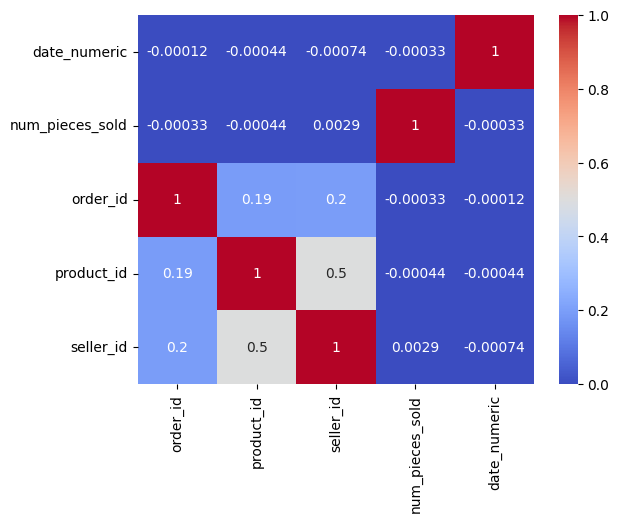

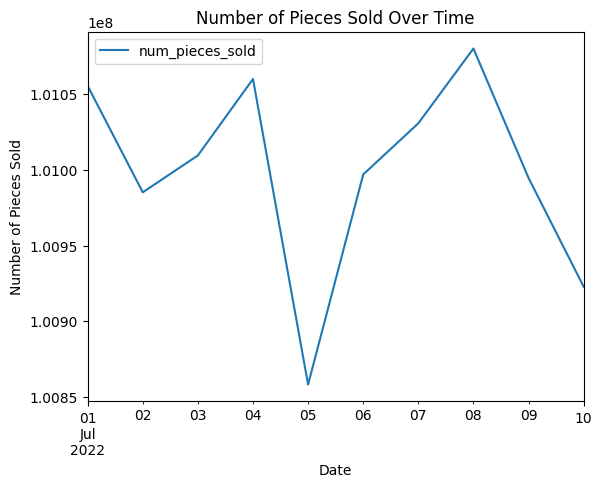

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/sales_no_outliers1.csv"
chunk_size = 20000

summary_stats = []
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    summary_stats.append(chunk.describe())

print(pd.concat(summary_stats).groupby(level=0).mean())

corr_matrices = []
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    numeric_chunk = chunk.select_dtypes(include=['number'])
    corr_matrices.append(numeric_chunk.corr())

mean_corr_matrix = pd.concat(corr_matrices).groupby(level=0).mean()

sns.heatmap(mean_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

sales_trend = {}
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    if 'date' in chunk.columns and 'num_pieces_sold' in chunk.columns:
        chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce')
        daily_sales = chunk.groupby('date')['num_pieces_sold'].sum()
        for date, sales in daily_sales.items():
            sales_trend[date] = sales_trend.get(date, 0) + sales

sales_df = pd.DataFrame(list(sales_trend.items()), columns=['date', 'num_pieces_sold'])
sales_df.sort_values('date', inplace=True)
sales_df.plot(x='date', y='num_pieces_sold', kind='line', title="Number of Pieces Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Pieces Sold")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "/content/sales_no_outliers1.csv"
chunk_size = 8000

use_cols = ['order_id', 'product_id', 'seller_id', 'num_pieces_sold', 'date_numeric']

data_chunks = []

for chunk in pd.read_csv(file_path, usecols=use_cols, chunksize=chunk_size):
    chunk['date_numeric'] = chunk['date_numeric'].astype(int)

    data_chunks.append(chunk)

df = pd.concat(data_chunks, ignore_index=True)

features = ['order_id', 'product_id', 'seller_id', 'date_numeric']
target = 'num_pieces_sold'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

print(f"عدد العينات في التدريب: {len(X_train)}, وعدد العينات في الاختبار: {len(X_test)}")

dt_model = DecisionTreeRegressor(max_depth=10,min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"\n **أداء النموذج:**")
print(f" MAE: {mae_dt:.2f}")
print(f" MSE: {mse_dt:.2f}")
print(f" R² Score: {r2_dt:.2f}")


عدد العينات في التدريب: 16000032, وعدد العينات في الاختبار: 4000008

 **أداء النموذج:**
 MAE: 25.00
 MSE: 833.13
 R² Score: -0.00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ تحميل البيانات باستخدام `chunksize`
file_path = "/content/sales_no_outliers1.csv"
chunk_size = 8000

# ✅ تحديد الأعمدة المطلوبة
use_cols = ['order_id', 'product_id', 'seller_id', 'num_pieces_sold', 'date_numeric']

# قوائم لتخزين البيانات
data_chunks = []

for chunk in pd.read_csv(file_path, usecols=use_cols, chunksize=chunk_size):
    # ✅ تحويل `product_id` و `seller_id` إلى تصنيفات رقمية داخل كل جزء فقط
    chunk['product_id'] = chunk['product_id'].astype('category').cat.codes
    chunk['seller_id'] = chunk['seller_id'].astype('category').cat.codes

    # ✅ التأكد من أن `order_id` رقمي إذا كان نصيًا
    if chunk['order_id'].dtype == 'object':
        chunk['order_id'] = chunk['order_id'].astype('category').cat.codes

    # ✅ تحويل `date_numeric` إلى عدد صحيح
    chunk['date_numeric'] = chunk['date_numeric'].astype(int)

    # ✅ إضافة الجزء المعالج إلى القائمة
    data_chunks.append(chunk)

# ✅ دمج جميع الأجزاء إلى DataFrame واحد
df = pd.concat(data_chunks, ignore_index=True)

# ✅ تحديد الميزات والمتغير المستهدف
features = ['order_id', 'product_id', 'seller_id', 'date_numeric']
target = 'num_pieces_sold'

# ✅ تقسيم البيانات إلى تدريب (80٪) واختبار (20٪)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

print(f"عدد العينات في التدريب: {len(X_train)}, وعدد العينات في الاختبار: {len(X_test)}")

# ✅ تدريب نموذج Decision Tree
dt_model = DecisionTreeRegressor(max_depth=10,min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)

# ✅ التنبؤ على بيانات الاختبار
y_pred_dt = dt_model.predict(X_test)

# ✅ تقييم النموذج
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"\n📊 **أداء النموذج:**")
print(f"✅ MAE: {mae_dt:.2f}")
print(f"✅ MSE: {mse_dt:.2f}")
print(f"✅ R² Score: {r2_dt:.2f}")


عدد العينات في التدريب: 16000032, وعدد العينات في الاختبار: 4000008


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # لحفظ النموذج بعد التدريب

# ✅ تحميل البيانات بطريقة أسرع باستخدام `dtype`
file_path = "/content/sales_no_outliers1.csv"
chunk_size = 8000

# ✅ تحديد أنواع البيانات لتوفير الذاكرة
dtypes = {
    'order_id': 'int32',
    'product_id': 'int32',
    'seller_id': 'int16',
    'num_pieces_sold': 'int16',
    'date_numeric': 'int32'
}

# ✅ تحميل البيانات باستخدام `chunksize`
data_chunks = []
for chunk in pd.read_csv(file_path, usecols=dtypes.keys(), dtype=dtypes, chunksize=chunk_size):
    data_chunks.append(chunk)

# ✅ دمج جميع الأجزاء إلى DataFrame واحد
df = pd.concat(data_chunks, ignore_index=True)

# ✅ إنشاء ميزة جديدة (تحويل `date_numeric` إلى يوم الأسبوع)
df['week_day'] = df['date_numeric'] % 7  # نفترض أنه رقم تسلسلي للأيام

# ✅ تحديد الميزات والمتغير المستهدف
features = ['order_id', 'product_id', 'seller_id', 'date_numeric', 'week_day']
target = 'num_pieces_sold'

# ✅ أخذ **عينة صغيرة عشوائية** (مثلاً 2 مليون عينة بدلًا من 20 مليون)
df_sample = df.sample(n=15_000_000, random_state=42)  # أخذ جزء صغير فقط

# ✅ تقسيم البيانات إلى تدريب (80٪) واختبار (20٪)
X_train, X_test, y_train, y_test = train_test_split(df_sample[features], df_sample[target], test_size=0.2, random_state=42)

print(f"عدد العينات في التدريب: {len(X_train)}, وعدد العينات في الاختبار: {len(X_test)}")

# ✅ تطبيع البيانات باستخدام `StandardScaler`
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ تدريب نموذج Random Forest مع تحسين المعلمات
rf_model = RandomForestRegressor(
    n_estimators=50,       # تقليل عدد الأشجار لزيادة السرعة
    max_depth=15,          # تقليل العمق لتسريع التدريب
    min_samples_split=10,  # منع الإفراط في التدريب
    min_samples_leaf=10,   # جعل الأوراق أكبر قليلًا
    random_state=42,
    n_jobs=-1              # استخدام كل المعالجات المتاحة
)
rf_model.fit(X_train_scaled, y_train)

# ✅ حفظ النموذج لتجنب إعادة التدريب
joblib.dump(rf_model, "/content/random_forest_model.pkl")

# ✅ التنبؤ على بيانات الاختبار
y_pred_rf = rf_model.predict(X_test_scaled)

# ✅ تقييم أداء النموذج
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\n **أداء نموذج Random Forest بعد التحسين:**")
print(f" MAE: {mae_rf:.2f}")
print(f" MSE: {mse_rf:.2f}")
print(f" R² Score: {r2_rf:.2f}")


عدد العينات في التدريب: 12000000, وعدد العينات في الاختبار: 3000000

 **أداء نموذج Random Forest بعد التحسين:**
 MAE: 25.01
 MSE: 833.98
 R² Score: -0.00


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# تحويل الميزات الفئوية باستخدام OneHotEncoding
categorical_features = ['product_id', 'seller_id']
numerical_features = ['order_id', 'date_numeric']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# إنشاء خط أنابيب (Pipeline) يتضمن المعالجة المسبقة والنموذج
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)

# تقييم النموذج
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n **أداء النموذج بعد التحسين:**")
print(f" MAE: {mae:.2f}")
print(f" MSE: {mse:.2f}")
print(f" R² Score: {r2:.2f}")

NameError: name 'X_train' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ تحميل البيانات باستخدام `chunksize`
file_path = "/content/sales_no_outliers1.csv"
chunk_size = 8000

# ✅ تحديد الأعمدة المطلوبة
use_cols = ['order_id', 'product_id', 'seller_id', 'num_pieces_sold', 'date_numeric']

# قوائم لتخزين البيانات
data_chunks = []

for chunk in pd.read_csv(file_path, usecols=use_cols, chunksize=chunk_size):
    chunk['date_numeric'] = chunk['date_numeric'].astype(int)  # التأكد من أن `date_numeric` عدد صحيح
    data_chunks.append(chunk)

# ✅ دمج جميع الأجزاء إلى DataFrame واحد
df = pd.concat(data_chunks, ignore_index=True)

# ✅ إنشاء ميزات جديدة (تحويل التاريخ إلى يوم الأسبوع)
df['week_day'] = df['date_numeric'] % 7  # تبسيطًا، نفترض أن القيم تعبر عن أيام متسلسلة

# ✅ تحديد الميزات والمتغير المستهدف
features = ['order_id', 'product_id', 'seller_id', 'date_numeric', 'week_day']
target = 'num_pieces_sold'

# ✅ تقسيم البيانات إلى تدريب (80٪) واختبار (20٪)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

print(f"عدد العينات في التدريب: {len(X_train)}, وعدد العينات في الاختبار: {len(X_test)}")

# ✅ تطبيع البيانات لتحسين أداء النموذج
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ تدريب نموذج Random Forest بعد تحسين المعلمات
rf_model = RandomForestRegressor(
    n_estimators=150,       # زيادة عدد الأشجار لتحسين الدقة
    max_depth=20,           # تعميق الشجرة لمزيد من الدقة
    min_samples_split=5,    # تقليل الحد الأدنى للتقسيم لتجنب التقسيم المفرط
    min_samples_leaf=5,     # تقليل عدد العينات في الورقة لتجنب التعقيد الزائد
    random_state=42,
    n_jobs=-1               # استخدام جميع الأنوية المتاحة لتسريع التدريب
)
rf_model.fit(X_train_scaled, y_train)

# ✅ التنبؤ على بيانات الاختبار
y_pred_rf = rf_model.predict(X_test_scaled)

# ✅ تقييم أداء النموذج
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\n **أداء نموذج Random Forest:**")
print(f" MAE: {mae_rf:.2f}")
print(f" MSE: {mse_rf:.2f}")
print(f" R² Score: {r2_rf:.2f}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ تحميل البيانات
file_path = "/content/sales_no_outliers1.csv"
df = pd.read_csv(file_path)

# ✅ تحويل التاريخ إلى عدد أيام منذ 1970
"""df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_numeric'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# ✅ تحويل معرفات المنتج والبائع إلى أرقام إذا لم تكن بالفعل رقمية
le_product = LabelEncoder()
df['product_id'] = le_product.fit_transform(df['product_id'])

le_seller = LabelEncoder()
df['seller_id'] = le_seller.fit_transform(df['seller_id'])"""

# ✅ تحديد الميزات والمتغير المستهدف
features = ['product_id', 'seller_id', 'date_numeric', 'order_id']
target = 'num_pieces_sold'

X = df[features]
y = df[target]

# ✅ تقسيم البيانات إلى تدريب (80٪) واختبار (20٪)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



FileNotFoundError: [Errno 2] No such file or directory: '/content/sales_no_outliers1.csv'